In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def movingAverage(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


folder_path = r'N:\TMAZE\TMAZE_DATA'#'C:\Users\ajemanu\Emory University\SOM Emanuel Lab - General\TMAZE\TMAZE_DATA'
file_pattern = '*.json' 
files = glob.glob(os.path.join(folder_path, file_pattern)) 

In [3]:
## edited code
#Correctness

files.sort(key= lambda x: x[-20:-5])
mouseID = 'BDB1'
list_of_files = []

for file in files: 
    if mouseID in file: 
        list_of_files.append(file)

        

correctness = {}
trialDuration = {}
direction = {}

max_trial_numbers = [] 
sessionDate = []
texture = []
for sessionID, file in enumerate(list_of_files[-22:]):
    data = pd.read_json(file, typ='frame')
    print(file)
    date = data[mouseID]['trial1']['trial_time']
    sessionDate.append('{0}_{1}_{2}'.format(date[0],date[1],date[2]))
    correctness[sessionID] = []
    trialDuration[sessionID] = []
    direction[sessionID] = []
    
    
    trial_numbers = [data[mouseID]['trial'+str(n+1)]['trial_number'] for n in range(len(data[mouseID]))]
    
    max_trial_numbers.append(max(trial_numbers))
    try: 
        texture.append(data[mouseID]['trial'+str(0+1)]['MazeTexture'])
    except KeyError:
        texture.append('gratings')
    for n in range(len(data[mouseID])):
        if n == 0:
            print(data[mouseID]['trial'+str(n+1)])
        correctness[sessionID].append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
        try:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['lick'] == 'right(V2)')
        except KeyError:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['valve'] == 'right')
        trialDuration[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        
        # if data[mouseID]['trial'+str(n+1)]['decision'] == 'correct':
        #     trial_times_correct[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        # else:
        #     trial_times_incorrect[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])

all_correctness = np.concatenate([correctness[n] for n in np.sort(list(correctness.keys()))])
session_lengths = [len(n) for n in [correctness[n] for n in np.sort(list(correctness.keys()))]]
session_lengths_cum = np.cumsum(session_lengths)

all_durations = np.concatenate([trialDuration[n] for n in np.sort(list(trialDuration.keys()))])
all_directions = np.concatenate([direction[n] for n in np.sort(list(direction.keys()))])

# Correct = []
# Correct_avg=[]    
# for session in trial_times_correct:
#     Correct.append(trial_times_correct[session])
#     Correct_avg.append(movingAverage(trial_times_correct[session]))

# # print(resultCorrect)
# # print(list_of_files)
# print(Correct_avg)

# plt.figure()
# for avg in Correct_avg:
#     plt.plot(avg)
# plt.xlabel('Trials')
# plt.ylabel('Correctness')
# plt.title('Moving Average of Correct Trials for ' + mouseID)

# plt.figure()
# for avg in Correct:
#     plt.step(np.arange(len(avg)),avg)
# plt.xlabel('Trials')
# plt.ylabel('Correctness')
# plt.title('Correct Trials for ' + mouseID)
# plt.legend(title='Session')

# #add all sessions together
# all_trial_correctness = np.concatenate([Correct_avg[n] for n in np.sort(list(Correct_avg.keys()))])#problematic
# plt.figure()
# plt.plot(all_trial_correctness)
# plt.ylabel('Correctness')
# plt.xlabel('Trial')
# plt.title('Concatenated Trials')
# plt.show()


N:\TMAZE\TMAZE_DATA\data_BDB1_20240329_154532.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,1', 'time_for_trial': 1, 'valve': 1, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 3, 29, 15, 45, 36, 4, 89, 1], 'right_probability': 1.0, 'rewardAmount(ms)': 35}
N:\TMAZE\TMAZE_DATA\data_BDB1_20240401_153544.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'correct', 'floorID': 'F,4', 'time_for_trial': 2, 'valve': 4, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 4, 1, 15, 35, 50, 0, 92, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 35}
N:\TMAZE\TMAZE_DATA\data_BDB1_20240401_153942.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,3', 'time_for_trial': 1, 'valve': 3, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 4, 1, 15, 39, 51, 0, 92, 1], 'right_probability': 1.0, 'rewa

In [4]:
PRE_summary = {}
CNO_summary = {}
SALINE_summary = {}

In [5]:
## extracting BDB1 correctness for pre-CNO and CNO trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDB1' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
        
CNO_files = []
PRE_files = []
SALINE_files = []

print("All files for mouseID:", list_of_files)

for file in list_of_files:
    print(file) 
    if ('20240407' in file) or ('20240405' in file):
        CNO_files.append(file)
    elif ('20240401' in file) or ('20240402' in file) or ('20240403' in file)or ('2024032' in file): ## dates occurring after March 19th and before April 3rd
        PRE_files.append(file)
    elif ('20240408' in file) or ('20240406' in file):
        SALINE_files.append(file)

print("CNO files:", CNO_files)
print("PRE files:", PRE_files)
print("SALINE files:", SALINE_files)
    

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []
for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness  = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

All files for mouseID: ['N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240226_162438.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240226_162946.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240226_163317.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240228_155345.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240229_141701.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240229_142706.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240305_161413.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240305_164008.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240306_152222.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240306_155119.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240307_132529.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240307_135137.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240308_161008.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240325_174702.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240325_181308.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240325_184355.json', 'N:\\TMAZE\\TMAZE_DATA\\data_BDB1_20240326_121312.json', 'N:\\TM

In [6]:
## extracting BDB2 correctness for pre-CNO and CNO trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDB2' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
                            
CNO_files = []
PRE_files = []
SALINE_files = []

for file in list_of_files:
    print(file)
    if ('20240408' in file) or ('20240406' in file):
        CNO_files.append(file)

    elif ('20240401' in file) or ('20240402' in file) or ('20240403' in file)or ('2024032' in file): ## dates occurring after March 19th and before April 3rd
        PRE_files.append(file)
    
    elif ('20240405' in file) or ('20240407' in file):
        SALINE_files.append(file)

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []
for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness  = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

N:\TMAZE\TMAZE_DATA\data_BDB2_20240226_180349.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240227_121138.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240227_121716.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240227_124120.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240228_170140.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240228_170316.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240301_151619.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240305_114355.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240306_163935.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240306_172140.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240307_114404.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240307_121827.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240307_124138.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240308_122630.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240308_130926.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240309_173758.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240309_180100.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240309_182427.json
N:\TMAZE\TMAZE_DATA\data_BDB2_20240309_182749.json
N:\TMAZE\TMAZE_DATA\data_BDB2_2

In [7]:
## extracting BDB3 correctness for pre-CNO and CNO trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDB3' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
                            
CNO_files = []
PRE_files = []
SALINE_files = []

for file in list_of_files:
    print(file)
    if ('20240213' in file) or ('20240215' in file):
        CNO_files.append(file)

    elif '2024020' in file: ## dates occurring between the first and 10th of February
        PRE_files.append(file)
    
    elif ('20240214' in file) or ('20240216' in file):
        SALINE_files.append(file)

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []
for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness  = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

N:\TMAZE\TMAZE_DATA\data_BDB3_20240104_155531.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240110_143443.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240110_150332.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240110_153157.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240126_154621.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240126_155855.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240126_160620.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240128_173915.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240128_182003.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240129_161545.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240129_162329.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240130_114615.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240130_120247.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240130_120705.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240130_125941.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240202_110408.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240202_114517.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240205_135044.json
N:\TMAZE\TMAZE_DATA\data_BDB3_20240205_161012.json
N:\TMAZE\TMAZE_DATA\data_BDB3_2

In [8]:
## extracting BDB5 correctness for pre-treatment and SALINE trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDB5' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
        
CNO_files = []
SALINE_files = []
PRE_files = []

for file in list_of_files:
    print(file)
    if ('20240213' in file) or ('20240215' in file):
        SALINE_files.append(file)

    elif ('20240206' in file) or ('20240207' in file) or ('20240208' in file) or ('20240209' in file) or ('20240212' in file): ## pre-treatment dates
        PRE_files.append(file)

    elif ('20240214' in file) or ('20240216' in file):
        CNO_files.append(file)

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []

for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

N:\TMAZE\TMAZE_DATA\data_BDB5_20240109_113423.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240110_122033.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240110_132034.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240110_135431.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240119_103425.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240119_114845.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240119_121831.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240122_152835.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240122_154418.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240123_095923.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240123_113013.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240123_115804.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240123_142940.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240123_145200.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240123_150643.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240126_100234.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240126_112143.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240126_112548.json
N:\TMAZE\TMAZE_DATA\data_BDB5_20240128_163127.json
N:\TMAZE\TMAZE_DATA\data_BDB5_2

In [9]:
## extracting BDC3 correctness for pre-CNO and CNO trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDC3' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
        
CNO_files = []
PRE_files = []
SALINE_files = []

for file in list_of_files:
    print(file)
    if ('20240213' in file) or ('20240215' in file):
        CNO_files.append(file)

    elif '2024020' in file: ## dates occurring between the first and 10th of February
        PRE_files.append(file)

    elif ('20240214' in file) or ('20240216' in file):
        SALINE_files.append(file)

    

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []
for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness  = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

N:\TMAZE\TMAZE_DATA\data_BDC3_20240109_095043.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240109_110356.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240109_153409.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240109_163300.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240109_163753.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240109_171034.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240110_090613.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240110_095932.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240118_175342.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240118_183758.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240118_190913.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240119_130458.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240119_133532.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240119_140140.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240122_133821.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240122_140116.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240122_175809.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240122_181213.json
N:\TMAZE\TMAZE_DATA\data_BDC3_20240123_152559.json
N:\TMAZE\TMAZE_DATA\data_BDC3_2

In [10]:
## extracting BDC4 correctness for pre-treatment and SALINE trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDC4' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
        
CNO_files = []
SALINE_files = []
PRE_files = []

for file in list_of_files:
    print(file)
    if ('20240408' in file) or ('20240406' in file):
        CNO_files.append(file)

    elif ('20240401' in file) or ('20240402' in file) or ('20240403' in file)or ('2024032' in file): ## dates occurring between March and before April 3rd
        PRE_files.append(file)
    
    elif ('20240405' in file) or ('20240407' in file):
        SALINE_files.append(file)
        
CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []

for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

N:\TMAZE\TMAZE_DATA\data_BDC4_20240229_115918.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240229_121257.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240301_114718.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240304_145603.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240304_155345.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240305_175124.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240308_141902.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240309_155334.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240309_160222.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240309_164646.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240310_181405.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240310_184633.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240312_141354.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240312_144948.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240312_152700.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240324_125030.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240324_125731.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240324_130929.json
N:\TMAZE\TMAZE_DATA\data_BDC4_20240324_131105.json
N:\TMAZE\TMAZE_DATA\data_BDC4_2

In [11]:
CNO_files

['N:\\TMAZE\\TMAZE_DATA\\data_BDC4_20240406_181859.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC4_20240406_184144.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC4_20240406_185930.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC4_20240406_191511.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC4_20240408_193118.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC4_20240408_195008.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC4_20240408_200742.json']

In [12]:
## extracting BDC5 correctness for pre-treatment and SALINE trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDC5' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
        
CNO_files = []
SALINE_files = []
PRE_files = []

for file in list_of_files:
    print(file)
    if ('20240213' in file) or ('20240215' in file):
        SALINE_files.append(file)

    elif '2024020' in file: ## pre-treatment dates
        PRE_files.append(file)

    elif ('20240214' in file) or ('20240216' in file):
        CNO_files.append(file)

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []

for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

N:\TMAZE\TMAZE_DATA\data_BDC5_20240108_132725.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240108_140833.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240108_150603.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240108_161735.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240108_163037.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240109_131850.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240109_132742.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240109_134349.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240109_143030.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240109_143337.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240110_103557.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240110_104518.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240110_115036.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240111_105409.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240126_140459.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240126_141712.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240129_132157.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240129_141456.json
N:\TMAZE\TMAZE_DATA\data_BDC5_20240130_132846.json
N:\TMAZE\TMAZE_DATA\data_BDC5_2

In [13]:
CNO_files

['N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240214_162231.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240214_165603.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240214_172013.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240216_165844.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240216_172528.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240216_174517.json']

In [14]:
SALINE_files

['N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240213_162631.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240213_170022.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240213_170512.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240213_172650.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240215_160723.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240215_162834.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240215_164710.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240215_170505.json']

In [15]:
CNO_files

['N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240214_162231.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240214_165603.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240214_172013.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240216_165844.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240216_172528.json',
 'N:\\TMAZE\\TMAZE_DATA\\data_BDC5_20240216_174517.json']

In [16]:
summaryData = pd.DataFrame([PRE_summary,SALINE_summary,CNO_summary],index=['PRE','SALINE','CNO\n5mg/kg'])

summaryData2 = pd.DataFrame([SALINE_summary,CNO_summary],index=['SALINE','CNO\n5mg/kg'])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\custe\\Emory University\\SOM Emanuel Lab - General\\TMAZE\\CNO Experiment Data\\CNO_summaryData_PREincluded.pdf'

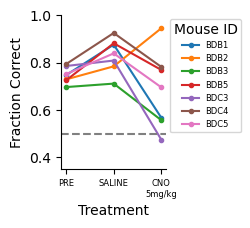

In [17]:
f = plt.figure(figsize=[1.35,2])
ax = f.gca()
summaryData.plot(kind='line',marker='o',ax=ax,ms=3)
ax.axhline(0.5,ls='--',color='gray')#,label='chance')
ax.set_ylim([0.35,1])

ax.set_ylabel('Fraction Correct')
ax.set_xlabel('Treatment')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=[1.0,0.5,0.5,0.5],title='Mouse ID',fontsize=6)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['PRE','SALINE','CNO\n5mg/kg'],fontsize=6)
plt.savefig(r'C:\Users\custe\Emory University\SOM Emanuel Lab - General\TMAZE\CNO Experiment Data\CNO_summaryData_PREincluded.pdf',dpi=600,bbox_inches='tight',transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\custe\\Emory University\\SOM Emanuel Lab - General\\TMAZE\\CNO Experiment Data\\CNO_summaryData.pdf'

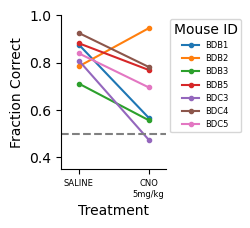

In [18]:
f = plt.figure(figsize=[1.35,2])
ax = f.gca()
summaryData2.plot(kind='line',marker='o',ax=ax,ms=3)
ax.axhline(0.5,ls='--',color='gray')#,label='chance')
ax.set_ylim([0.35,1])

ax.set_ylabel('Fraction Correct')
ax.set_xlabel('Treatment')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=[1.0,0.5,0.5,0.5],title='Mouse ID',fontsize=6)
ax.set_xticks([0,1])
ax.set_xlim([-0.25,1.25])
ax.set_xticklabels(['SALINE','CNO\n5mg/kg'],fontsize=6)
plt.savefig(r'C:\Users\custe\Emory University\SOM Emanuel Lab - General\TMAZE\CNO Experiment Data\CNO_summaryData.pdf',dpi=600,bbox_inches='tight',transparent=True)

In [ ]:
summaryData2.T['SALINE']

BDB1    0.876289
BDB2    0.784615
BDB3    0.711790
BDB5    0.882075
BDC3    0.809117
BDC4    0.925424
BDC5    0.839416
Name: SALINE, dtype: float64

In [ ]:
import scipy.stats
scipy.stats.ttest_rel(summaryData2.T['SALINE'],summaryData2.T['CNO\n5mg/kg'])

TtestResult(statistic=2.418310525275552, pvalue=0.0519824894779364, df=6)

In [ ]:
summaryData.T.keys()

Index(['PRE', 'SALINE', 'CNO\n5mg/kg'], dtype='object')

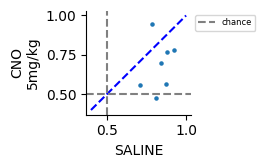

In [ ]:
f = plt.figure(figsize=[1.35,1.35])
ax = f.gca()
ax.scatter(x=summaryData.T['SALINE'],y=summaryData.T['CNO\n5mg/kg'],marker='o',s=5)
ax.plot([0.4,1],[0.4,1],ls='--',color='b')#,label='chance')
#ax.set_ylim([0.35,1])
ax.axhline(0.5,ls='--',color='gray',label='chance')
ax.axvline(0.5,ls='--',color='gray')#,label='chance')
ax.set_ylabel('CNO\n5mg/kg')
ax.set_xlabel('SALINE')
ax.legend(fontsize=6,bbox_to_anchor=[1.0,0.5,0.5,0.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\custe\Emory University\SOM Emanuel Lab - General\TMAZE\CNO Experiment Data\TMAZE_CNO_summaryData_scatter.pdf',dpi=600,bbox_inches='tight',transparent=True)

In [35]:
mouseID = 'BFL4'

N:\TMAZE\TMAZE_DATA\data_BFL4_20240909_173528.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': True, 'decision': 'correct', 'floorID': 'F,2', 'time_for_trial': 49, 'valve': 2, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 9, 9, 17, 38, 57, 0, 253, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 35, 'BiasCorrection(T/F)': False, 'coneHeight_1(floor1)': '1.5', 'coneHeight_2(floor2)': '1.5'}
N:\TMAZE\TMAZE_DATA\data_BFL4_20240911_101416.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,1', 'time_for_trial': 5, 'valve': 1, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 9, 11, 10, 17, 56, 2, 255, 1], 'right_probability': 1.0, 'rewardAmount(ms)': 50, 'BiasCorrection(T/F)': True, 'coneHeight_1(floor1)': '1.5', 'coneHeight_2(floor2)': '1.5'}
N:\TMAZE\TMAZE_DATA\data_BFL4_20240911_105644.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision':

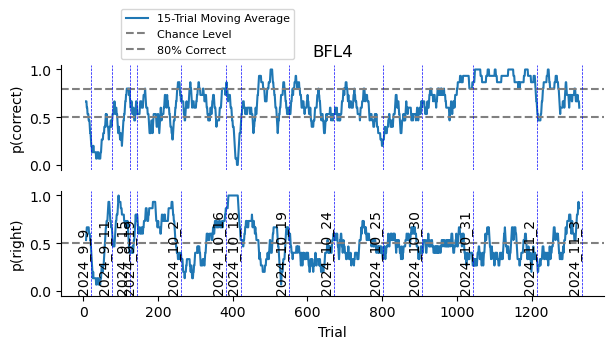

In [36]:
files.sort(key= lambda x: x[-20:-5])
# mouseID = 'BFL1'
list_of_files = []

for file in files: 
    if mouseID in file: 
        list_of_files.append(file)

        

correctness = {}
trialDuration = {}
direction = {}

max_trial_numbers = [] 
sessionDate = []
texture = []
for sessionID, file in enumerate(list_of_files):
    data = pd.read_json(file, typ='frame')
    print(file)
    date = data[mouseID]['trial1']['trial_time']
    sessionDate.append('{0}_{1}_{2}'.format(date[0],date[1],date[2]))
    correctness[sessionID] = []
    trialDuration[sessionID] = []
    direction[sessionID] = []
    
    
    trial_numbers = [data[mouseID]['trial'+str(n+1)]['trial_number'] for n in range(len(data[mouseID]))]
    
    max_trial_numbers.append(max(trial_numbers))
    try: 
        texture.append(data[mouseID]['trial'+str(0+1)]['MazeTexture'])
    except KeyError:
        texture.append('gratings')
    for n in range(len(data[mouseID])):
        if n == 0:
            print(data[mouseID]['trial'+str(n+1)])
        correctness[sessionID].append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
        try:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['lick'] == 'right(V2)')
        except KeyError:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['valve'] == 'right')
        trialDuration[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        
        # if data[mouseID]['trial'+str(n+1)]['decision'] == 'correct':
        #     trial_times_correct[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        # else:
        #     trial_times_incorrect[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])

all_correctness = np.concatenate([correctness[n] for n in np.sort(list(correctness.keys()))])
session_lengths = [len(n) for n in [correctness[n] for n in np.sort(list(correctness.keys()))]]
session_lengths_cum = np.cumsum(session_lengths)

all_durations = np.concatenate([trialDuration[n] for n in np.sort(list(trialDuration.keys()))])
all_directions = np.concatenate([direction[n] for n in np.sort(list(direction.keys()))])

MA_n = 15
f, ax = plt.subplots(2,1, figsize=[7,3])
#plt.step(np.arange(len(all_correctness)),all_correctness,lw=0.5)
#plt.plot(movingAverage(all_correctness,5),label='MA n = 5')
xaxis = np.arange(len(movingAverage(all_correctness,MA_n)))+MA_n/2
ax[0].plot(xaxis,movingAverage(all_correctness,MA_n),label='{}-Trial Moving Average'.format(MA_n))
# ax.plot(movingAverage(all_correctness,20),label='MA n = 20')
ax[1].plot(xaxis,movingAverage(all_directions,MA_n),label='MAdirection n = {}'.format(MA_n))
# ax2 = ax.twinx()
# ax2.plot(all_durations,label='Trial Duration (s)')
ax[0].axhline(0.5,ls='--',color='gray',label='Chance Level')
ax[0].axhline(0.8,ls='--',color='gray',label='80% Correct')
ax[1].axhline(0.5,ls='--',color='gray',label='Chance Level')
for i, sessionBoundary in enumerate(session_lengths_cum):
    try:
        if sessionDate[i] != sessionDate[i+1]:
            ax[0].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
            ax[1].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
            ax[1].text(sessionBoundary,0,sessionDate[i],ha='right',rotation=90)
    except IndexError:
        ax[0].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
        ax[1].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
        
        ax[1].text(sessionBoundary,0,sessionDate[i],ha='right',rotation=90)
# for i, text in enumerate(texture):
    # if text == 'R/S':
    #     ax[0].fill_betweenx([-0.05,1.05],session_lengths_cum[i-1],session_lengths_cum[i],color='r',alpha=0.1,edgecolor=None)
    #     ax[1].fill_betweenx([-0.05,1.05],session_lengths_cum[i-1],session_lengths_cum[i],color='r',alpha=0.1,edgecolor=None)
# ax[0].arrow(session_lengths_cum[-6],1.3,0,-0.1,head_width=10,head_length=0.05,color='r',clip_on=False)
# ax[0].text(session_lengths_cum[-6],1.3,'Whisker Trim',ha='center',va='bottom',color='r')
ax[0].legend(bbox_to_anchor=(0.1, 1.0),fontsize=8)
ax[0].set_ylim([-0.05,1.05])
ax[1].set_ylim([-0.05,1.05])
ax[1].set_xlabel('Trial')
ax[0].set_ylabel('p(correct)')
ax[1].set_ylabel('p(right)')
ax[0].set_xticks([])
ax[0].set_title(mouseID)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

In [ ]:
session_lengths_cum

array([  2,  29,  46,  59,  73,  74, 104, 144, 194, 244, 257, 307, 357,
       366, 416, 466, 486, 536, 586, 631, 681, 731, 760])

In [ ]:
session_lengths

[2,
 27,
 17,
 13,
 14,
 1,
 30,
 40,
 50,
 50,
 13,
 50,
 50,
 9,
 50,
 50,
 20,
 50,
 50,
 45,
 50,
 50,
 29]

In [ ]:
all_correctness[session_lengths_cum[1-5]]

False

C:\Users\pliu79\Downloads\TMAZE_DATA\data_BAB2_20231008_134555.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,1', 'time_for_trial': 2, 'valve': 1, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2023, 10, 8, 13, 46, 6, 6, 281, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 30}
C:\Users\pliu79\Downloads\TMAZE_DATA\data_BAB2_20231009_135700.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,4', 'time_for_trial': 2, 'valve': 4, 'lick': 'right(V2)', 'trial_number': 1, 'trial_time': [2023, 10, 9, 13, 57, 40, 0, 282, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 25}
C:\Users\pliu79\Downloads\TMAZE_DATA\data_BAB2_20231009_141858.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,4', 'time_for_trial': 1, 'valve': 4, 'lick': 'right(V2)', 'trial_number': 1, 'trial_time': [2023, 10,

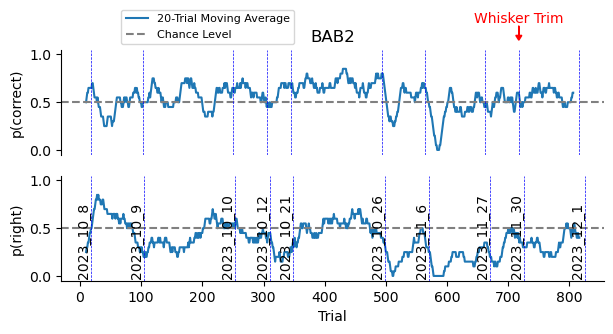

In [ ]:
## Plotting BAB2 with whisker trim indication (occurred on 11/1/2023)
#Correctness

files.sort(key= lambda x: x[-20:-5])
mouseID = 'BAB2'
list_of_files = []

for file in files: 
    if mouseID in file: 
        list_of_files.append(file)

        

correctness = {}
trialDuration = {}
direction = {}

max_trial_numbers = [] 
sessionDate = []
texture = []
for sessionID, file in enumerate(list_of_files[-22:]):
    data = pd.read_json(file, typ='frame')
    print(file)
    date = data[mouseID]['trial1']['trial_time']
    sessionDate.append('{0}_{1}_{2}'.format(date[0],date[1],date[2]))
    correctness[sessionID] = []
    trialDuration[sessionID] = []
    direction[sessionID] = []
    
    
    trial_numbers = [data[mouseID]['trial'+str(n+1)]['trial_number'] for n in range(len(data[mouseID]))]
    
    max_trial_numbers.append(max(trial_numbers))
    try: 
        texture.append(data[mouseID]['trial'+str(0+1)]['MazeTexture'])
    except KeyError:
        texture.append('gratings')
    for n in range(len(data[mouseID])):
        if n == 0:
            print(data[mouseID]['trial'+str(n+1)])
        correctness[sessionID].append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
        try:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['lick'] == 'right(V2)')
        except KeyError:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['valve'] == 'right')
        trialDuration[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        
        # if data[mouseID]['trial'+str(n+1)]['decision'] == 'correct':
        #     trial_times_correct[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        # else:
        #     trial_times_incorrect[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])

all_correctness = np.concatenate([correctness[n] for n in np.sort(list(correctness.keys()))])
session_lengths = [len(n) for n in [correctness[n] for n in np.sort(list(correctness.keys()))]]
session_lengths_cum = np.cumsum(session_lengths)

all_durations = np.concatenate([trialDuration[n] for n in np.sort(list(trialDuration.keys()))])
all_directions = np.concatenate([direction[n] for n in np.sort(list(direction.keys()))])

MA_n = 20
f, ax = plt.subplots(2,1, figsize=[7,3])
#plt.step(np.arange(len(all_correctness)),all_correctness,lw=0.5)
#plt.plot(movingAverage(all_correctness,5),label='MA n = 5')
xaxis = np.arange(len(movingAverage(all_correctness,MA_n)))+MA_n/2
ax[0].plot(xaxis,movingAverage(all_correctness,MA_n),label='{}-Trial Moving Average'.format(MA_n))
# ax.plot(movingAverage(all_correctness,20),label='MA n = 20')
ax[1].plot(xaxis,movingAverage(all_directions,MA_n),label='MAdirection n = {}'.format(MA_n))
# ax2 = ax.twinx()
# ax2.plot(all_durations,label='Trial Duration (s)')
ax[0].axhline(0.5,ls='--',color='gray',label='Chance Level')
ax[1].axhline(0.5,ls='--',color='gray',label='Chance Level')
for i, sessionBoundary in enumerate(session_lengths_cum):
    try:
        if sessionDate[i] != sessionDate[i+1]:
            ax[0].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
            ax[1].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
            ax[1].text(sessionBoundary,0,sessionDate[i],ha='right',rotation=90)
    except IndexError:
        ax[0].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
        ax[1].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
        ax[1].text(sessionBoundary,0,sessionDate[i],ha='right',rotation=90)
# for i, text in enumerate(texture):
    # if text == 'R/S':
    #     ax[0].fill_betweenx([-0.05,1.05],session_lengths_cum[i-1],session_lengths_cum[i],color='r',alpha=0.1,edgecolor=None)
    #     ax[1].fill_betweenx([-0.05,1.05],session_lengths_cum[i-1],session_lengths_cum[i],color='r',alpha=0.1,edgecolor=None)
ax[0].arrow(session_lengths_cum[-2],1.3,0,-0.1,head_width=10,head_length=0.05,color='r',clip_on=False)
ax[0].text(session_lengths_cum[-2],1.3,'Whisker Trim',ha='center',va='bottom',color='r')
ax[0].legend(bbox_to_anchor=(0.1, 1.0),fontsize=8)
ax[0].set_ylim([-0.05,1.05])
ax[1].set_ylim([-0.05,1.05])
ax[1].set_xlabel('Trial')
ax[0].set_ylabel('p(correct)')
ax[1].set_ylabel('p(right)')
ax[0].set_xticks([])
ax[0].set_title(mouseID)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)